# Dataset Information
This dataset was available as a part of Azure AI Notebooks for Predictive Maintenance.

* Telemetry Time Series Data (PdM_telemetry.csv): It consists of hourly average of voltage, rotation, pressure, vibration collected from 100 machines for the year 2015.

* Error (PdM_errors.csv): These are errors encountered by the machines while in operating condition. Since, these errors don't shut down the machines, these are not considered as failures. The error date and times are rounded to the closest hour since the telemetry data is collected at an hourly rate.

* Maintenance (PdM_maint.csv): If a component of a machine is replaced, that is captured as a record in this table. Components are replaced under two situations: 1. During the regular scheduled visit, the technician replaced it (Proactive Maintenance) 2. A component breaks down and then the technician does an unscheduled maintenance to replace the component (Reactive Maintenance). This is considered as a failure and corresponding data is captured under Failures. Maintenance data has both 2014 and 2015 records. This data is rounded to the closest hour since the telemetry data is collected at an hourly rate.

* Failures (PdM_failures.csv): Each record represents replacement of a component due to failure. This data is a subset of Maintenance data. This data is rounded to the closest hour since the telemetry data is collected at an hourly rate.

* Metadata of Machines (PdM_Machines.csv): Model type & age of the Machines.

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [59]:
def load_data(path='../data/'):
    df_sensors = pd.read_csv(path + 'PdM_telemetry.csv')
    df_metadata = pd.read_csv(path + 'PdM_machines.csv')
    df_maintenance = pd.read_csv(path + 'PdM_maint.csv')
    df_failures = pd.read_csv(path + 'PdM_failures.csv')
    df_errors = pd.read_csv(path + 'PdM_errors.csv')
    return df_sensors, df_metadata, df_maintenance, df_failures, df_errors

In [72]:
df_sensors, df_metadata, df_maintenance, df_failures, df_errors = load_data()


In [73]:
# Format date & time. Sort based on date for better readability
tables = [df_sensors, df_maintenance, df_failures, df_errors]
for df in tables:
    df["datetime"] = pd.to_datetime(df["datetime"], format="%Y-%m-%d %H:%M:%S")
    df.sort_values(["datetime", "machineID"], inplace=True, ignore_index=True)

In [74]:
print(f"Shape of the Telemetry Records: {df_sensors.shape}")
df_sensors.head()

Shape of the Telemetry Records: (876100, 6)


,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 06:00:00,2,176.558913,424.624162,76.005332,43.767049
2,2015-01-01 06:00:00,3,185.482043,461.211137,87.453199,28.216864
3,2015-01-01 06:00:00,4,169.710847,463.646727,95.929877,38.400372
4,2015-01-01 06:00:00,5,165.082899,452.283576,84.591722,40.298803


In [75]:
print('Numbers of machines: ',df_sensors.machineID.unique().shape[0])

Numbers of machines:  100


In [76]:
df_sensors.datetime.describe()

count                 876100
mean     2015-07-02 18:00:00
min      2015-01-01 06:00:00
25%      2015-04-02 12:00:00
50%      2015-07-02 18:00:00
75%      2015-10-02 00:00:00
max      2016-01-01 06:00:00
Name: datetime, dtype: object

In [77]:
features = list(df_sensors.drop(['datetime', 'machineID'], axis=1).columns)

In [78]:
def plot_time_series(df,features):
    rcParams['figure.figsize'] = 15,2
    for column in features:
        sns.lineplot(df, y=column, x='datetime')
        plt.show()

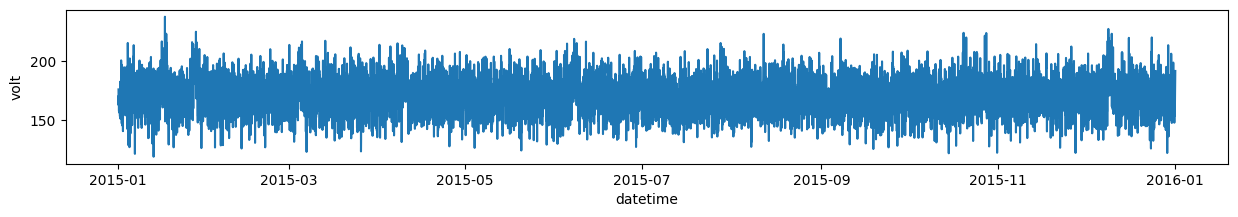

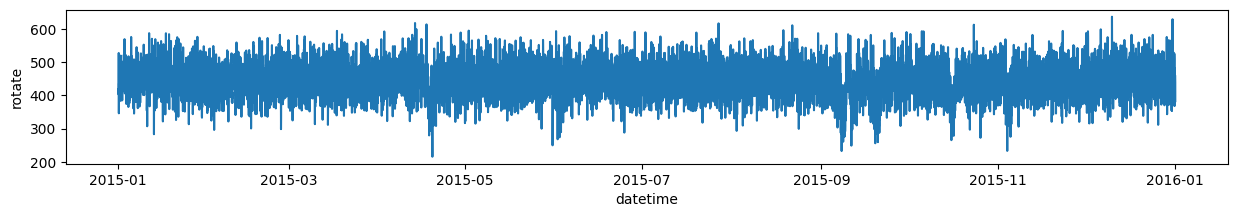

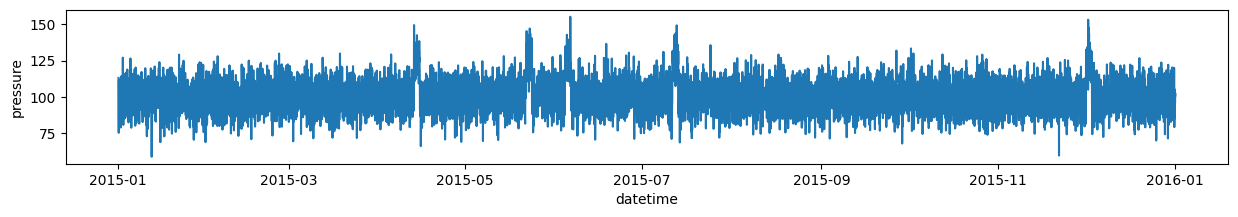

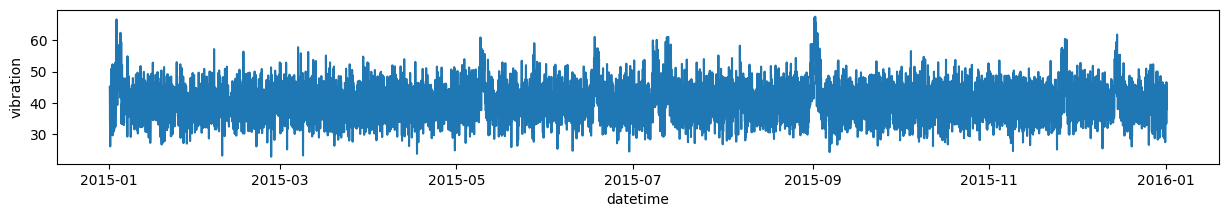

In [79]:
df_vib_machine_1 = df_sensors[df_sensors.machineID == 1].set_index("datetime")
plot_time_series(df_vib_machine_1, features)

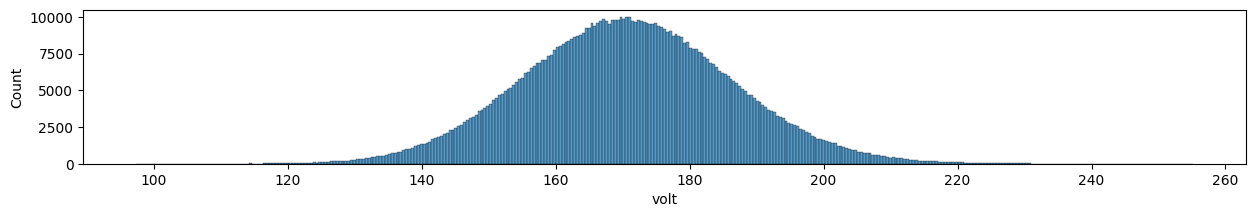

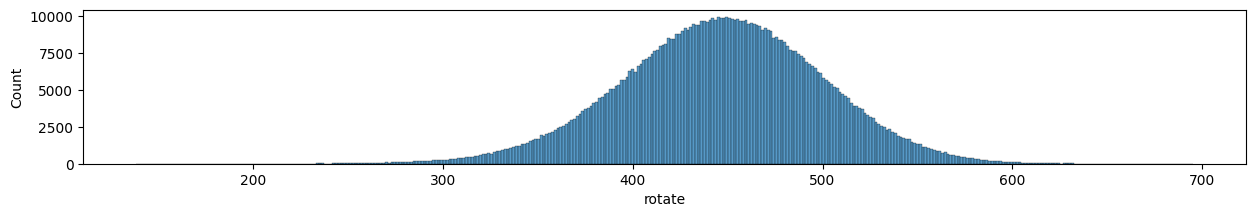

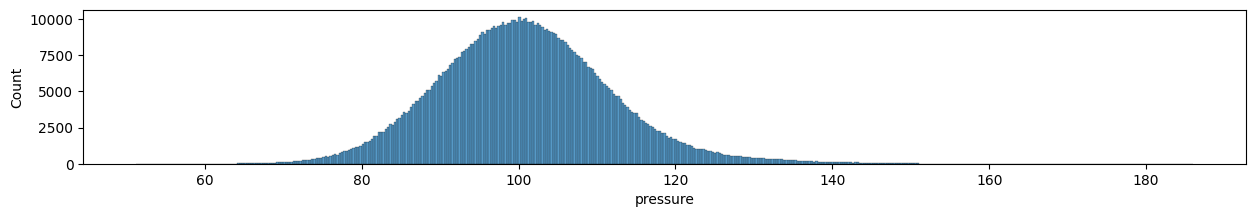

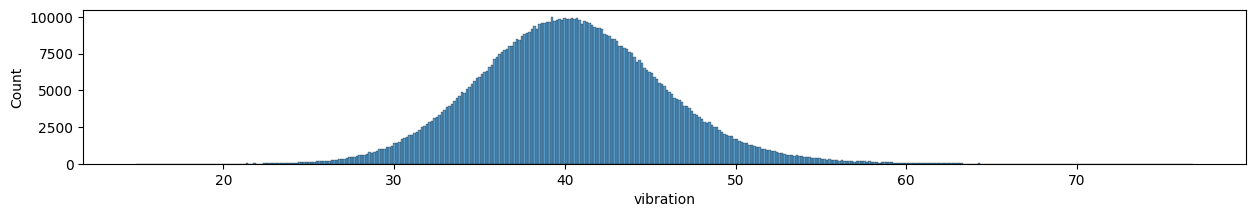

In [80]:
for column in features:
    sns.histplot(df_sensors, x=column)
    plt.show()

/var/folders/b8/nfnzstw97wz52qyktzmr2ly40000gn/T/ipykernel_1295/2370142742.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_tmp = df_tmp.set_index('datetime').asfreq('H')


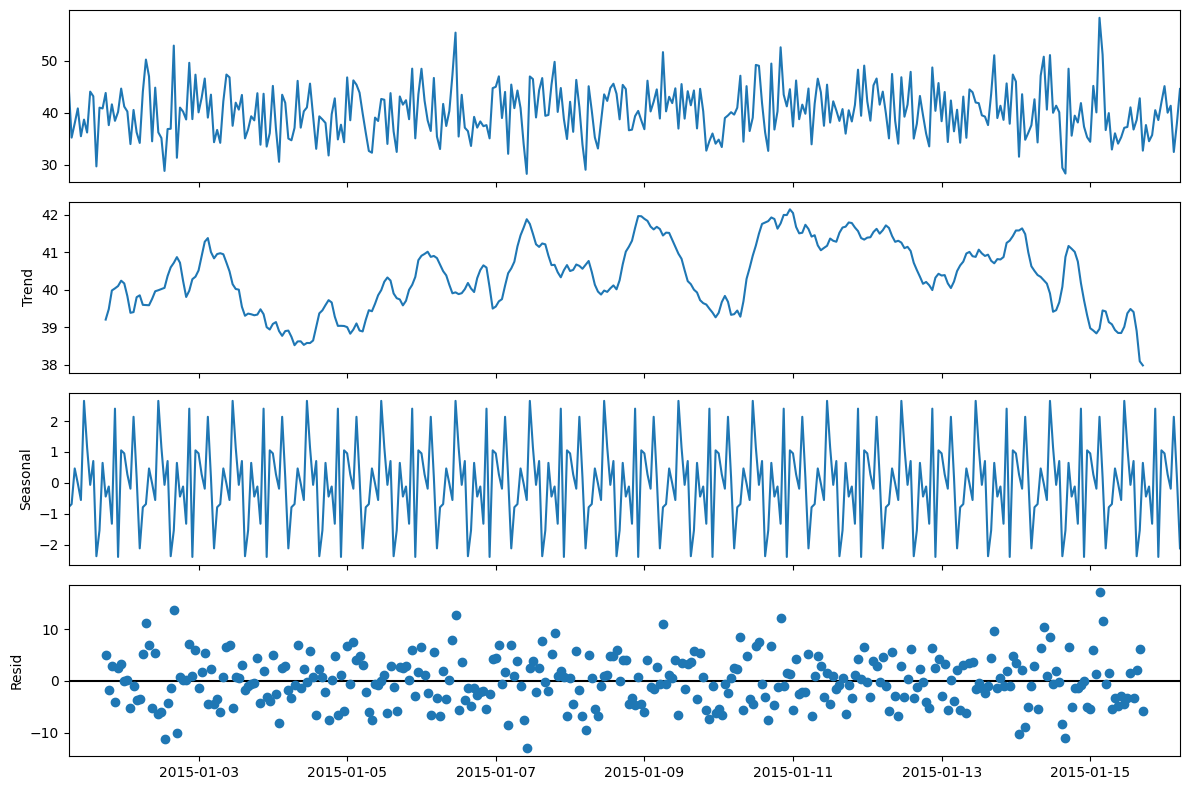

In [93]:
df_sensors['datetime'] = pd.to_datetime(df_sensors['datetime'])
df_tmp = df_sensors.query('machineID == 10')[:24*15]
df_tmp = df_tmp.set_index('datetime').asfreq('H')
rcParams['figure.figsize'] = 12, 8

# Decompose and plot
decomposed = seasonal_decompose(df_tmp[['vibration']], model='additive')
decomposed.plot();

## Erros data

In [12]:
print(f"Shape of the Error Records: {df_errors.shape}")
print("\n")
df_errors.head()

Shape of the Error Records: (3919, 3)




,datetime,machineID,errorID
0,2015-01-01 06:00:00,24,error1
1,2015-01-01 06:00:00,73,error4
2,2015-01-01 06:00:00,81,error1
3,2015-01-01 07:00:00,43,error3
4,2015-01-01 08:00:00,14,error4


In [13]:
# Sort the Error based "datetime", "machineID", "errorID" for better readability
df_errors = df_errors.sort_values(["datetime", "machineID", "errorID"]).reset_index(drop=True)

In [14]:
df_errors.machineID = df_errors.machineID.astype('category')
df_errors.errorID = df_errors.errorID.astype('category')

/var/folders/b8/nfnzstw97wz52qyktzmr2ly40000gn/T/ipykernel_1295/2844598300.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_errors.groupby('errorID')['errorID'].count().sort_values().plot.barh(title='AMOUNT OF ERROR FOR EACH TYPE OF ERROR')


<Axes: title={'center': 'AMOUNT OF ERROR FOR EACH TYPE OF ERROR'}, ylabel='errorID'>

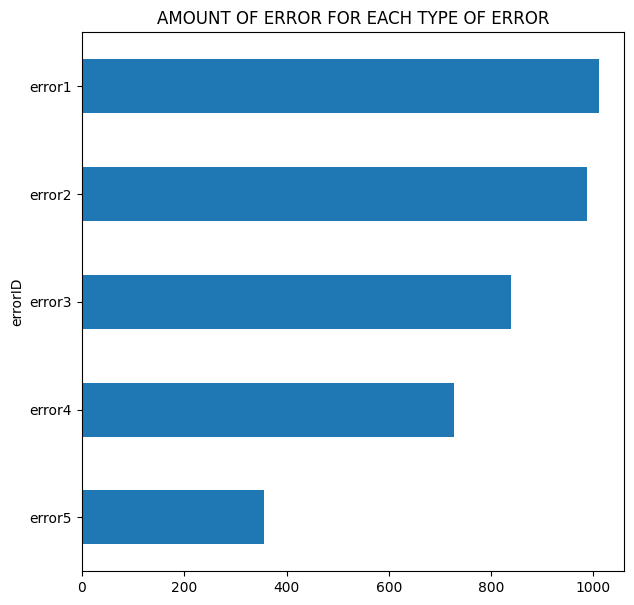

In [15]:
rcParams['figure.figsize'] = 7,7
df_errors.groupby('errorID')['errorID'].count().sort_values().plot.barh(title='AMOUNT OF ERROR FOR EACH TYPE OF ERROR')

/var/folders/b8/nfnzstw97wz52qyktzmr2ly40000gn/T/ipykernel_1295/4145449280.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_errors.groupby('machineID')['machineID'].count().sort_values().plot.barh(title='AMOUNT OF ERRORS FOR EACH MACHINE ')


<Axes: title={'center': 'AMOUNT OF ERRORS FOR EACH MACHINE '}, ylabel='machineID'>

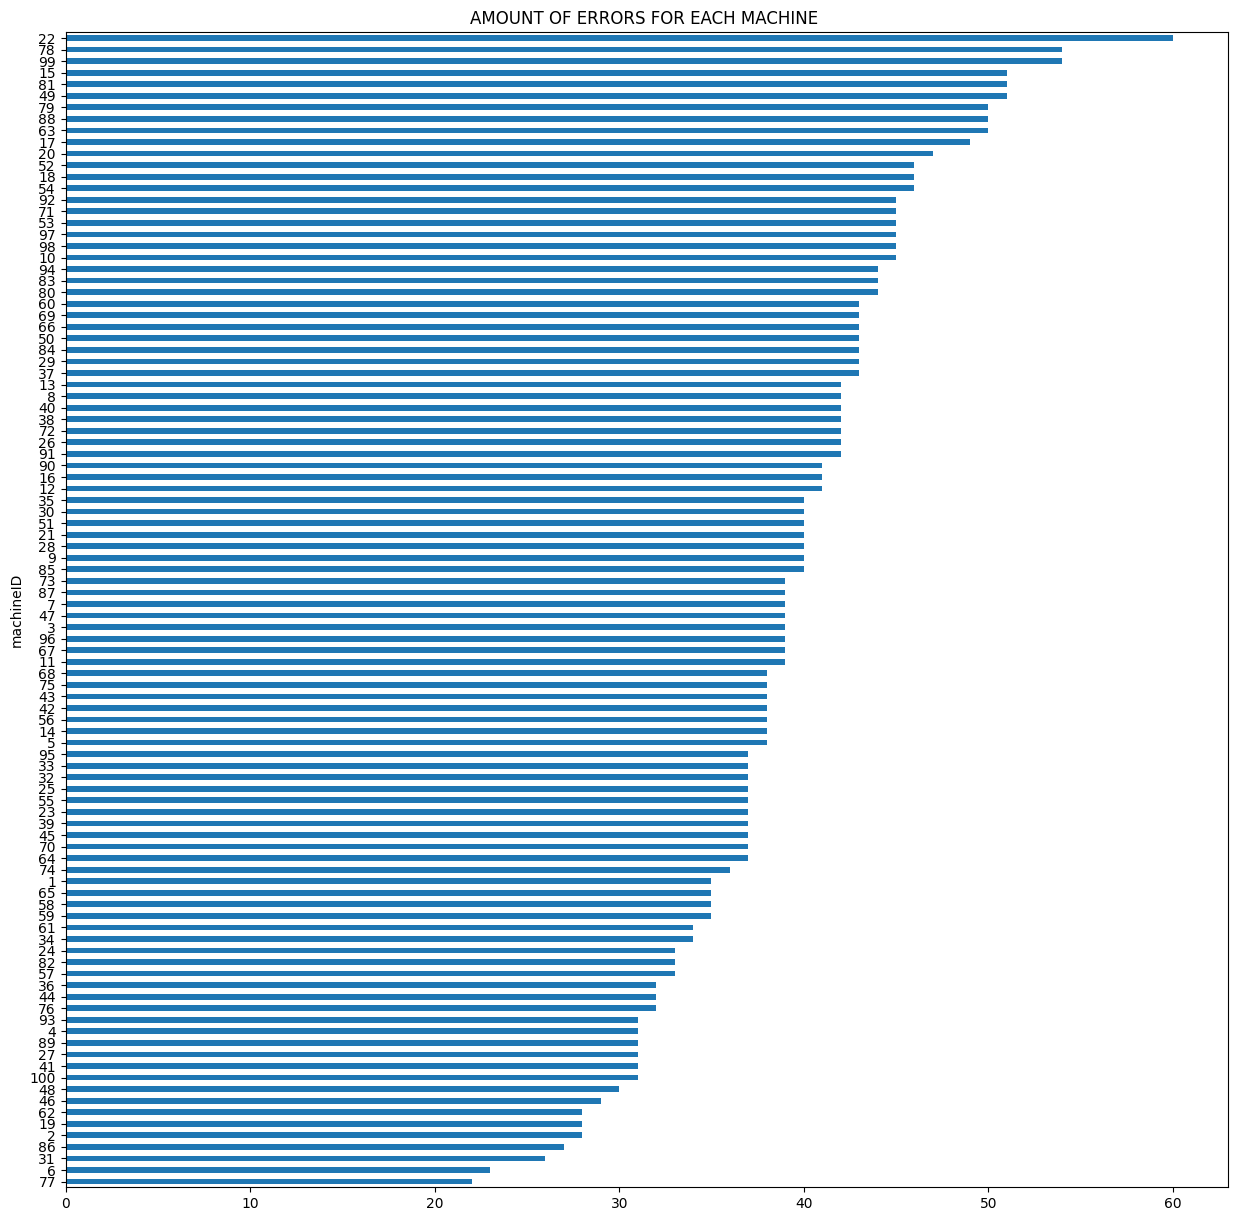

In [16]:
rcParams['figure.figsize'] = 15,15
df_errors.groupby('machineID')['machineID'].count().sort_values().plot.barh(title='AMOUNT OF ERRORS FOR EACH MACHINE ')

<Axes: title={'center': 'AMOUNT OF ERRORS EACH DAY'}, xlabel='datetime'>

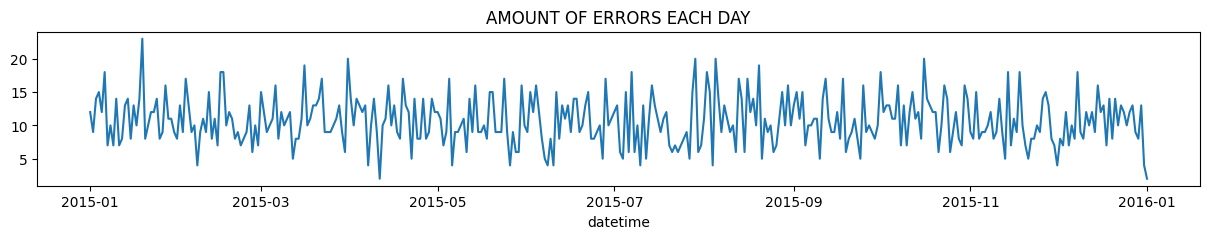

In [17]:
rcParams['figure.figsize'] = 15,2
df_errors.datetime.dt.date.value_counts().sort_index().plot(title='AMOUNT OF ERRORS EACH DAY')

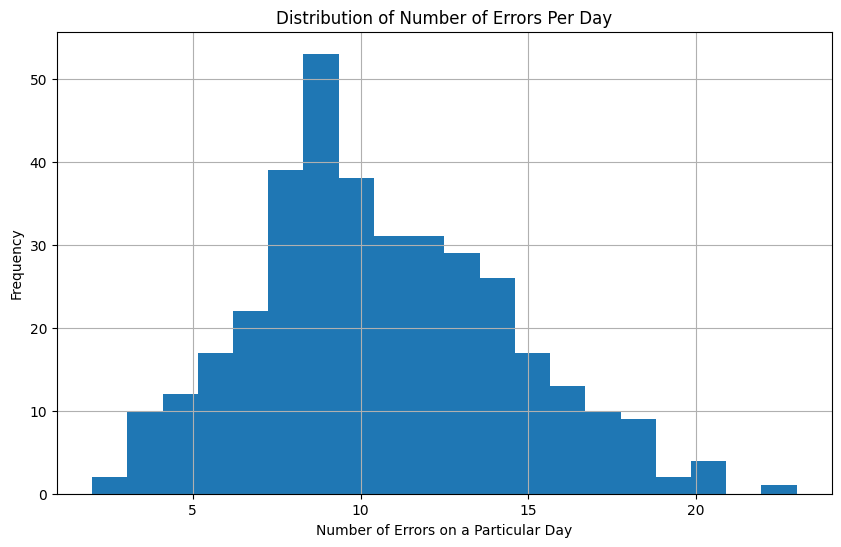

In [18]:
df_errors['date'] = df_errors.datetime.dt.date

df_errors.groupby('date').size().hist(bins=20, figsize=(10, 6))
plt.title("Distribution of Number of Errors Per Day")
plt.xlabel("Number of Errors on a Particular Day")
plt.ylabel("Frequency")
plt.show()

## Maintenance Data

In [19]:
print(f"Shape of the Maintenance Records: {df_maintenance.shape}")
print("\n")
df_maintenance.head()

Shape of the Maintenance Records: (3286, 3)




,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-06-01 06:00:00,6,comp2
2,2014-06-01 06:00:00,9,comp1
3,2014-06-01 06:00:00,9,comp2
4,2014-06-01 06:00:00,11,comp2


In [20]:
df_maintenance['month_year'] = df_maintenance.datetime.dt.year.astype('str') + '-' + df_maintenance.datetime.dt.month.astype('str')

<Axes: title={'center': 'AMOUNT OF MAINTENANCE PER MONTH OF YEAR'}, ylabel='month_year'>

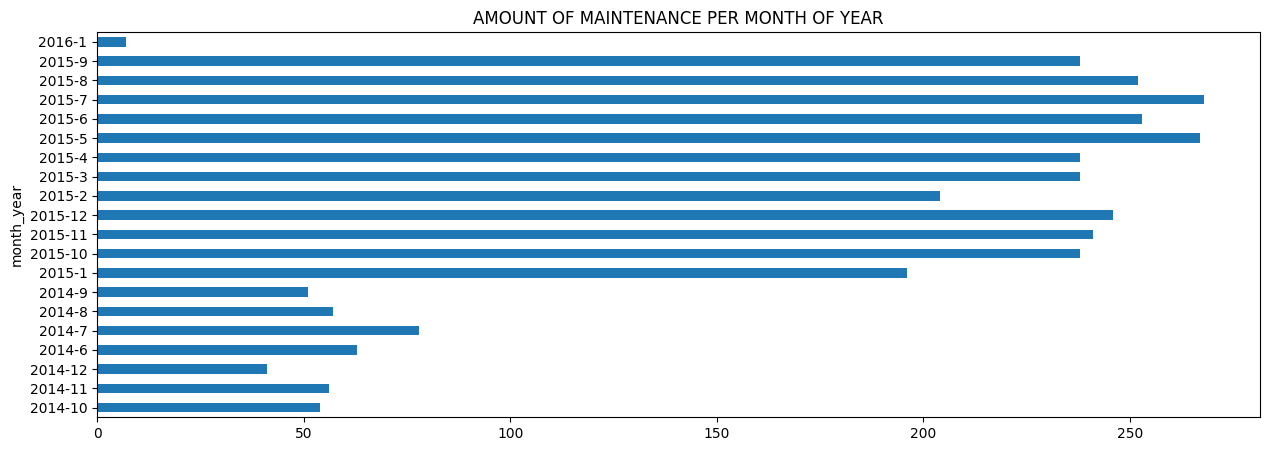

In [21]:
rcParams['figure.figsize'] = 15,5
df_maintenance.groupby('month_year')['machineID'].count().plot.barh(title='AMOUNT OF MAINTENANCE PER MONTH OF YEAR')

<Axes: title={'center': 'AMOUNT OF REPLACEMENTS PER COMPONENT'}, ylabel='comp'>

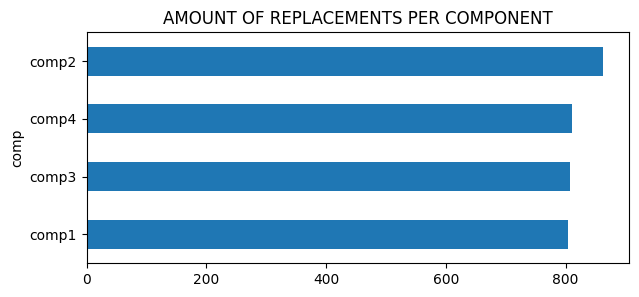

In [22]:
rcParams['figure.figsize'] = 7,3
df_maintenance.groupby('comp')['comp'].count().sort_values().plot.barh(title='AMOUNT OF REPLACEMENTS PER COMPONENT')

<Axes: title={'center': 'AMOUNT OF REPLACEMENTS PER COMPONENT'}, ylabel='machineID'>

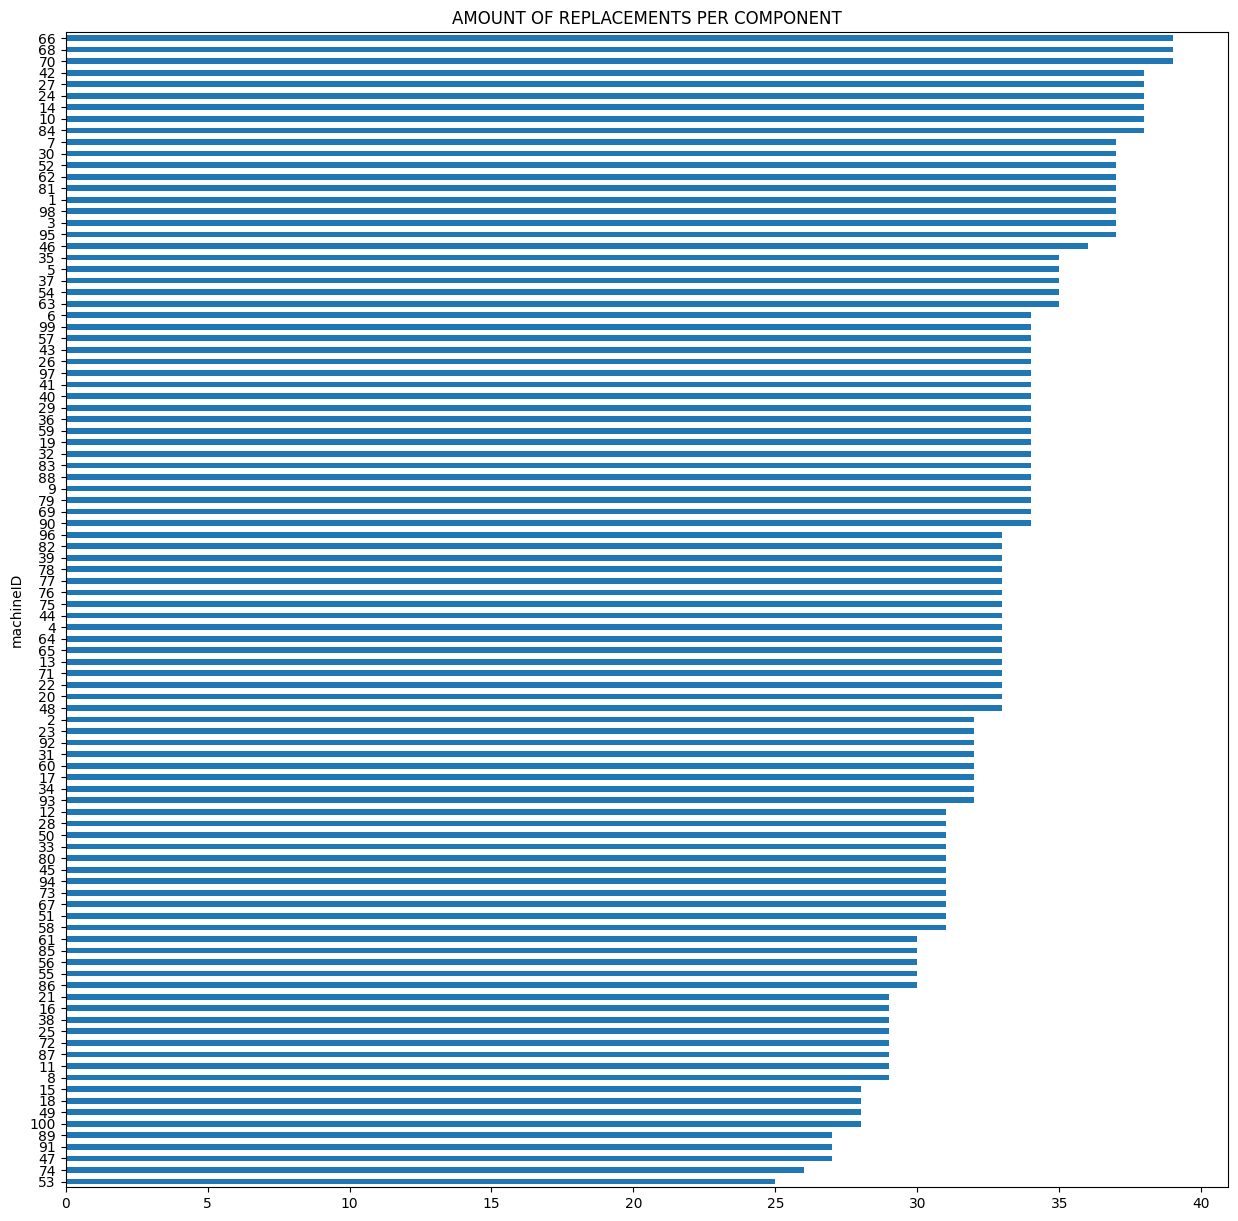

In [23]:
rcParams['figure.figsize'] = 15,15
df_maintenance.groupby('machineID')['machineID'].count().sort_values().plot.barh(title='AMOUNT OF REPLACEMENTS PER COMPONENT')

<Axes: title={'center': 'AMOUNT OF MAINTENANCE PER DAY'}, xlabel='datetime'>

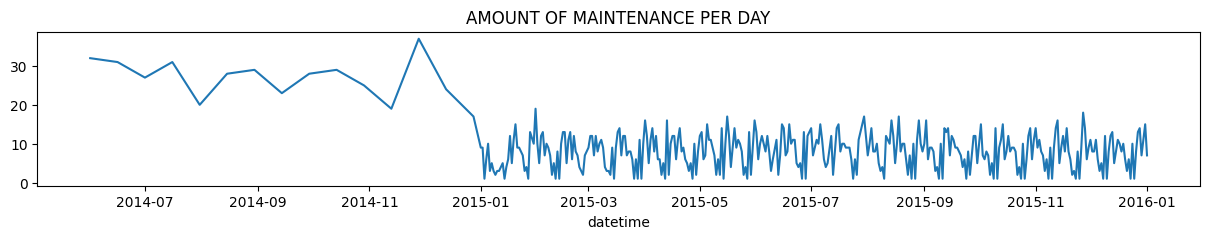

In [24]:
rcParams['figure.figsize'] = 15,2
df_maintenance.datetime.dt.date.value_counts().sort_index().plot(title='AMOUNT OF MAINTENANCE PER DAY')

## FAILURE DATA

In [25]:
print(f"Shape of the FAILUES Data: {df_failures.shape}")
print("\n")
df_failures.head()

Shape of the FAILUES Data: (761, 3)




,datetime,machineID,failure
0,2015-01-02 03:00:00,16,comp1
1,2015-01-02 03:00:00,16,comp3
2,2015-01-02 03:00:00,17,comp4
3,2015-01-02 03:00:00,22,comp1
4,2015-01-02 03:00:00,35,comp1


In [26]:
df_failures = df_failures.sort_values(by=['datetime', 'machineID'])

In [27]:
df_failures['month_year'] = df_failures.datetime.dt.year.astype('str') + '-' + df_failures.datetime.dt.month.astype('str')

<Axes: title={'center': 'AMOUNT OF FAILURES PER MONTH OF YEAR'}, ylabel='month_year'>

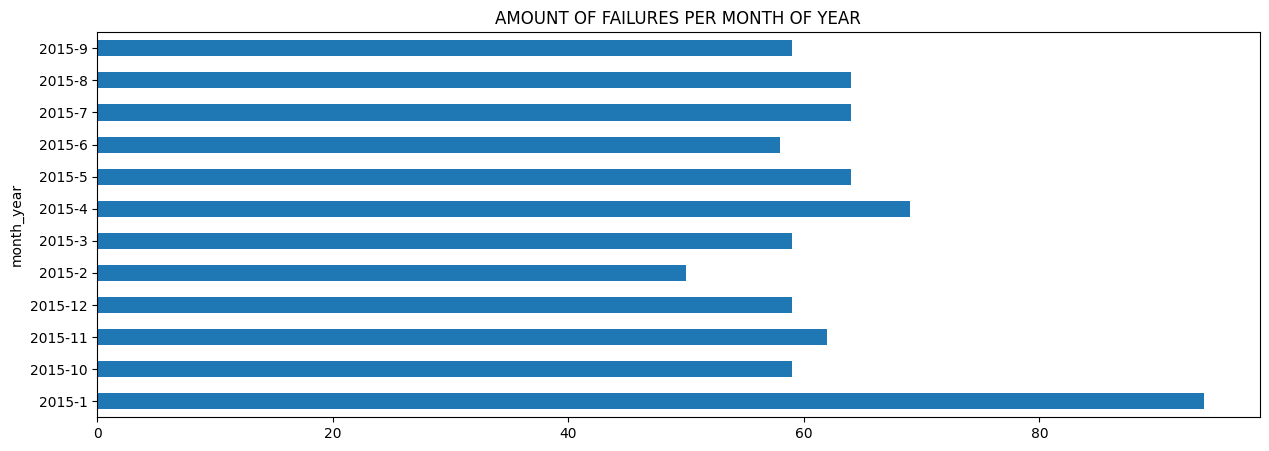

In [28]:
rcParams['figure.figsize'] = 15,5
df_failures.groupby('month_year')['machineID'].count().plot.barh(title='AMOUNT OF FAILURES PER MONTH OF YEAR')

## VISUALIZATION

In [29]:
df_sensors.shape

(876100, 6)

In [30]:
df_sensors.merge(df_failures, how='outer').merge(df_maintenance, how='outer').merge(df_errors, how='outer')

,datetime,machineID,volt,rotate,pressure,vibration,failure,month_year,comp,errorID,date
0,2014-06-01 06:00:00,1,NaN,NaN,NaN,NaN,NaN,2014-6,comp2,NaN,NaN
1,2014-06-01 06:00:00,6,NaN,NaN,NaN,NaN,NaN,2014-6,comp2,NaN,NaN
2,2014-06-01 06:00:00,9,NaN,NaN,NaN,NaN,NaN,2014-6,comp1,NaN,NaN
3,2014-06-01 06:00:00,9,NaN,NaN,NaN,NaN,NaN,2014-6,comp2,NaN,NaN
4,2014-06-01 06:00:00,11,NaN,NaN,NaN,NaN,NaN,2014-6,comp2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
879065,2016-01-01 06:00:00,96,157.157424,380.691266,102.885777,35.445739,NaN,NaN,NaN,NaN,NaN
879066,2016-01-01 06:00:00,97,159.607756,458.143799,100.945230,40.011599,NaN,NaN,NaN,NaN,NaN
879067,2016-01-01 06:00:00,98,165.717790,501.520194,114.553412,37.696504,NaN,NaN,NaN,NaN,NaN
879068,2016-01-01 06:00:00,99,168.439623,427.990029,107.899979,44.193151,NaN,NaN,NaN,NaN,NaN


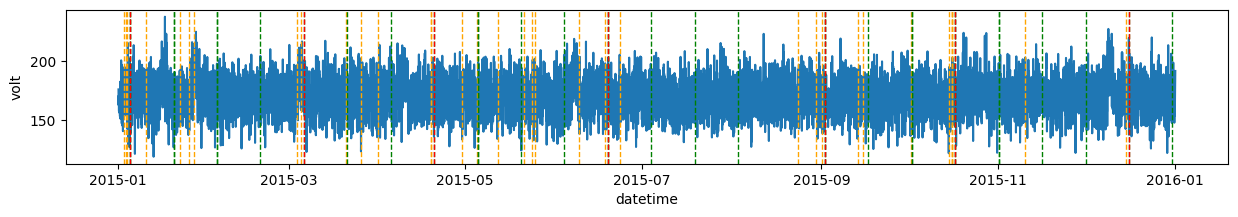

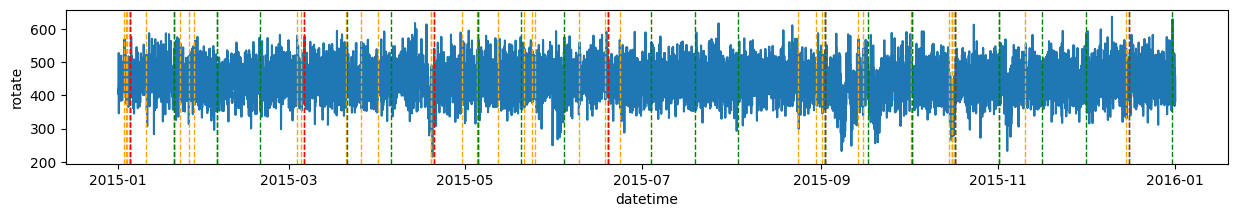

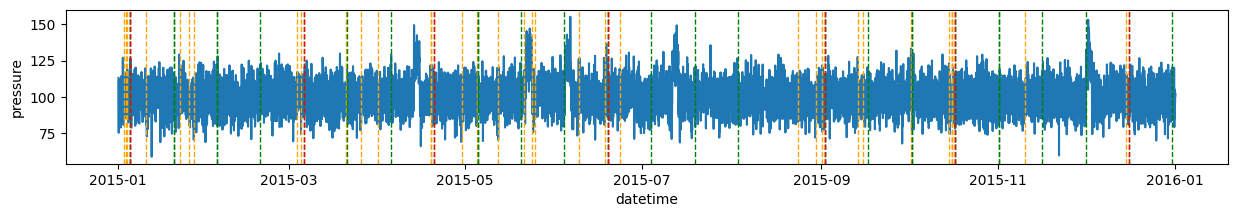

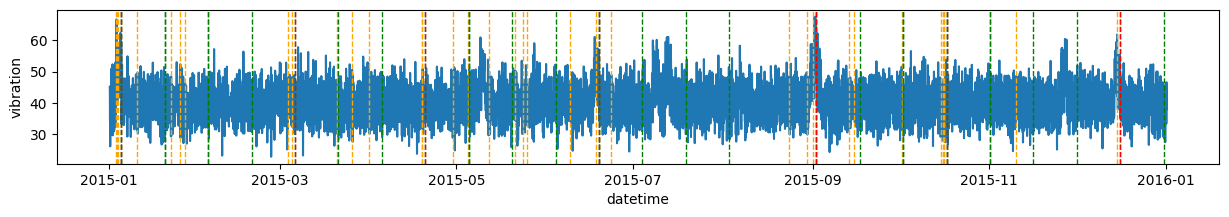

In [31]:
rcParams['figure.figsize'] = 15,2
machine_id = 1
for column in features:
    sns.lineplot(df_sensors.query(f'machineID == {machine_id}'), y=column, x='datetime')
    for error_date in df_errors.query(f'machineID == {machine_id}')['datetime']:
        plt.axvline(x=error_date, color='orange', linestyle='--', linewidth=1, label='Error')
    for maintenance_date in df_maintenance.query(f'machineID == {machine_id} and datetime >= "2015-01-01"')['datetime']:
        plt.axvline(x=maintenance_date, color='green', linestyle='--', linewidth=1, label='Error')
    for failure_date in df_failures.query(f'machineID == {machine_id}')['datetime']:
        plt.axvline(x=failure_date, color='red', linestyle='--', linewidth=1, label='Error')
    plt.show()


In [33]:
df

,datetime,machineID,errorID
0,2015-01-01 06:00:00,24,error1
1,2015-01-01 06:00:00,73,error4
2,2015-01-01 06:00:00,81,error1
3,2015-01-01 07:00:00,43,error3
4,2015-01-01 08:00:00,14,error4
...,...,...,...
3914,2015-12-31 18:00:00,91,error4
3915,2015-12-31 20:00:00,23,error3
3916,2015-12-31 23:00:00,94,error3
3917,2016-01-01 05:00:00,8,error3


In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose